In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 80s 0us/step


In [6]:
train_images.shape

(50000, 32, 32, 3)

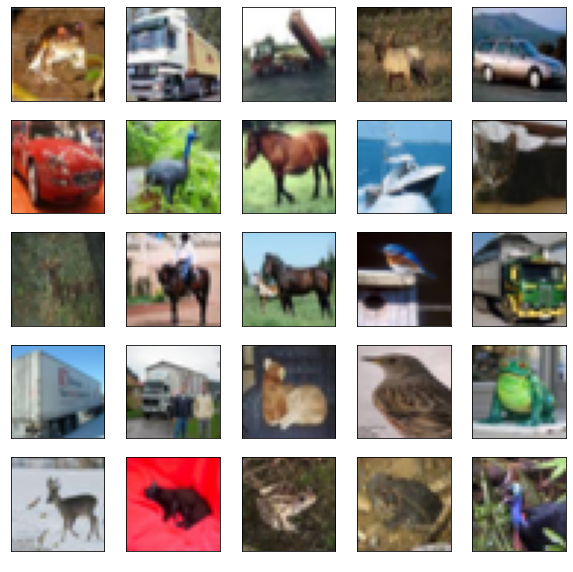

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]], color='white')
    
plt.show()

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [11]:
model.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5116 - accuracy: 0.4471 - val_loss: 1.2398 - val_accuracy: 0.5569
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1382 - accuracy: 0.5966 - val_loss: 1.0514 - val_accuracy: 0.6265
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9854 - accuracy: 0.6541 - val_loss: 0.9777 - val_accuracy: 0.6637
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8917 - accuracy: 0.6879 - val_loss: 0.9051 - val_accuracy: 0.6801
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8204 - accuracy: 0.7125 - val_loss: 0.8594 - val_accuracy: 0.7029
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7659 - accuracy: 0.7300 - val_loss: 0.9144 - val_accuracy: 0.6812
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7220 - accuracy: 0.7474 - val_loss: 0.8569 - val_accuracy:

313/313 - 1s - loss: 0.8739 - accuracy: 0.7142


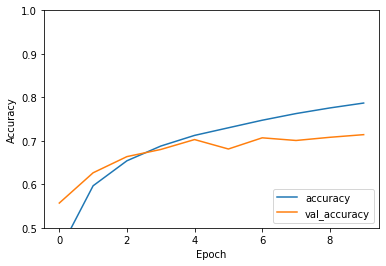

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

In [13]:
print(test_acc)

0.7142000198364258
